In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib as mpl
import os
import glob
mpl.rcParams['figure.dpi'] = 70

In [30]:
def line_95_percent(cummulative_regret, label=None, color='b', linewidth=3):
    m = np.mean(cummulative_regret, axis=0)
    s = np.std(cummulative_regret, axis=0)
    u = m + s * 1.96
    l = m - s * 1.96
    plt.plot(m, label=label, color=color, linewidth=linewidth)
    plt.fill_between(range(cummulative_regret.shape[1]), u, l, alpha=0.15, color=color)

In [41]:
def preprocess(dir_path):
    M = []
    for file in glob.glob('{}/result*'.format(dir_path)):
        with open(file, 'rb') as f:
            reward, time_step = pickle.load(f)
            n = int(np.ceil(time_step[-1]/1e3))*1000
#             plt.plot(time_step, reward)
            x = range(n)
            y = np.interp(x,  time_step, reward)
#             y = y[:max_step]
            M.append(y)
    #print(M[0].shape, M[1].shape)
    M = np.vstack(M)
    return M


def plot(path, limit_line):
    M = preprocess(path)
    plt.grid()
    line_95_percent(M, 'avg')
    plt.xlabel('t', fontweight='bold')
    plt.ylabel('Reward', fontweight='bold')
    plt.axhline(limit_line, color='r')
# plt.title('Cartpole-v0')
# plt.savefig('Cartpole-v0-avg-reward.png', dpi=300)

# Cartpole Plot

In [4]:
M = preprocess('../tmp/cartpole-v1-f2-b2-15e3-ld-1', 15000)
plt.grid()
line_95_percent(M, 'avg')
plt.xlabel('t', fontweight='bold')
plt.ylabel('Reward', fontweight='bold')
plt.axhline(500, color='r')

ValueError: need at least one array to concatenate

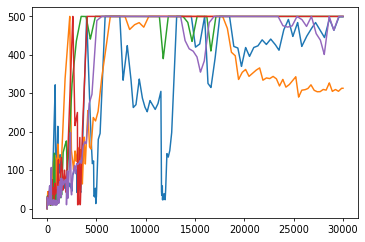

In [27]:
for m in M:
    plt.plot(m)

In [69]:
!ls ../tmp

algo-val-env-Acrobot-v1-fourier_order-2-beta-0.1-lambda-1.0-step-20000-discount-0.99
algo-val-env-Acrobot-v1-fourier_order-2-beta-1.0-lambda-1.0-step-20000-discount-0.99
algo-val-env-CartPole-v1-fourier_order-2-beta-2.0-lambda-1.0-step-100000-discount-0.99


In [70]:
M = preprocess('../tmp/algo-val-env-CartPole-v1-fourier_order-2-beta-2.0-lambda-1.0-step-100000-discount-0.99')
plt.grid()
line_95_percent(M, 'avg')
plt.xlabel('t', fontweight='bold')
plt.ylabel('Reward', fontweight='bold')
plt.axhline(500, color='r')

ValueError: need at least one array to concatenate

ValueError: need at least one array to concatenate

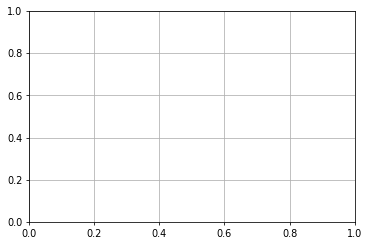

In [32]:
plt.grid()
max_step = 15000
# M = preprocess('../train_result/pol-cartpole-v1-f2-b2-15e3-ld-1', max_step)
M = preprocess('../tmp/pol-cartpole-v1-f2-b2-15e3-ld-1', max_step)
M = M[:4,:]
line_95_percent(M, 'Policy iteration')
M = preprocess('../train_result/cartpole-v1-f2-b2-15e3-ld-1', max_step)
line_95_percent(M, 'Value iteration', 'g')
plt.xlabel(r'$t\times 10^3$', fontweight='bold')
plt.ylabel('Reward', fontweight='bold')
plt.axhline(500, color='r')
plt.title('Cartpole-v1')
plt.yticks([0,250,500])
plt.xticks(range(0, 11000, 1000), range(0,11))
plt.legend(loc=4)
plt.savefig('Cartpole-v1.png', dpi=300)

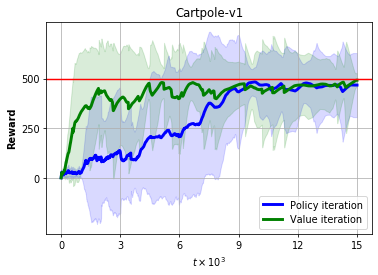

In [67]:
plt.grid()
max_step = 15000
M = preprocess('../train_result/pol-cartpole-v1-f2-b2-15e3-ld-1')
line_95_percent(M, 'Policy iteration')
M = preprocess('../train_result/cartpole-v1-f2-b2-15e3-ld-1')
line_95_percent(M, 'Value iteration', 'g')
plt.xlabel(r'$t\times 10^3$', fontweight='bold')
plt.ylabel('Reward', fontweight='bold')
plt.axhline(500, color='r')
plt.title('Cartpole-v1')
plt.yticks([0,250,500])
plt.xticks(range(0, 16000, 3000), range(0,16,3))
plt.legend(loc=4)
plt.savefig('cartpole-v1.png', dpi=300)

In [81]:
!ls ../tmp

acrobot-v1-f2-b10-20e3-ld-1 car-v1-f2-b10-15e3-ld-1
acrobot-v1-f2-b2            car-v1-f2-b10-20e3-ld-1
acrobot-v1-f2-b20-20e3-ld-1 car-v1-f2-b5-15e3-ld-1
acrobot-v1-f2-b5-15e3-ld-1  car-v1-f2-b5-20e3-ld-1
acrobot-v1-f2-b5-20e3-ld-1


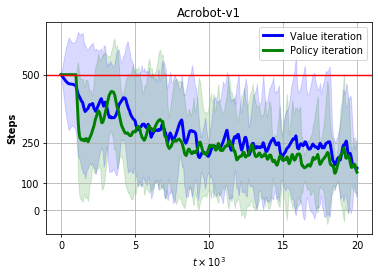

In [66]:
plt.grid()
M = preprocess('../train_result/acrobot-v1-f2-b10-20e3-ld-1')
line_95_percent(M, 'Value iteration')
M = preprocess('../train_result/pol-acrobot-v1-f2-b10-20e3-ld-1')
line_95_percent(M, 'Policy iteration', 'g')
plt.xlabel('t', fontweight='bold')
plt.ylabel('Steps', fontweight='bold')
plt.axhline(500, color='r')
plt.yticks([0,100,250,500])
plt.xticks(range(0, 21000, 5000), range(0,21,5))
plt.xlabel(r'$t\times 10^3$', fontweight='bold')
plt.title('Acrobot-v1')
plt.legend()
plt.savefig('acrobot-v1', dpi=300)

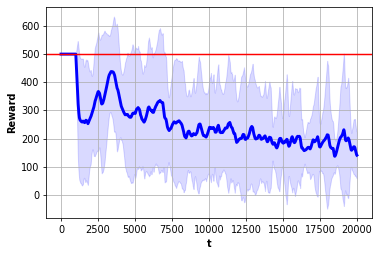

In [63]:
M = preprocess('../tmp/pol-acrobot-v1-f2-b10-20e3-ld-1', 20000)
plt.grid()
line_95_percent(M, 'avg')
plt.xlabel('t', fontweight='bold')
plt.ylabel('Reward', fontweight='bold')
plt.axhline(500, color='r')

In [10]:
!ls ../train_result

acrobot-v1-f2               car-v0-f2-b2-1e4step
acrobot-v1-f2-b10-20e3-ld-1 pole-v0-f2-torch
car-v0-f2


In [53]:
plot('../tmp/cartpole-v1-f2-b2-15e3-ld-1', 500)

TypeError: preprocess() missing 1 required positional argument: 'max_step'

In [52]:
c = np../tmp/acrobot-v1-f2-b40-15e3-ld-0.1/)]*6))
c = [i.flatten() for i in c]

In [53]:
np.stack(c).shape

(6, 729)

864